# Demographics Summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score

ON_COLAB = False
FILEROOT = ""
if (ON_COLAB):
    # LOGIC TO RUN ON GOOGLE COLAB
    from google.colab import drive
    drive.mount("/drive", force_remount=True)
    FILEROOT = "/drive/My Drive/Colab Notebooks/"


df = pd.read_csv(FILEROOT + 'StatePoliciesWithDemographic2.csv')

In [2]:
print (df.dtypes)

StateAbbv                   object
StateName                   object
P1_StatePlan                object
P2_Standards                object
P3_Funding                  object
P4_Certification            object
P5_PreserviceIncentives     object
P6_StateCSposition          object
P7_RequireHStoOffer         object
P8_CountGradReq             object
P9_HigherEdAdmission        object
PctReportedFCS             float64
YearOfLast                   int64
NumOfHS                      int64
NumHSWithCS                  int64
PctHSwFCS                  float64
TotalStudents                int64
NumStudentsinHSwCS           int64
PctStudentsHSwCS           float64
Total_Black                  int64
Total_HLLL                   int64
Total_Native                 int64
Total_HPI                    int64
Total_White                  int64
Total_Asian                  int64
Total_TwoPlus                int64
InCSHS_Black                 int64
InCSHS_HLLL                  int64
InCSHS_Native       

In [3]:
# Policies one/zero and count number of policies implemented
policies = ['P1_StatePlan','P2_Standards', 'P3_Funding', 'P4_Certification', 'P5_PreserviceIncentives', 'P6_StateCSposition', 'P7_RequireHStoOffer',
'P8_CountGradReq', 'P9_HigherEdAdmission']
policiesB = ["B" + p for p in policies]

def makeBinary(yesno):
    if (yesno.upper() == 'YES'):
        return 1
    else:
        return 0
    
for i in range(len(policies)):
    df[policiesB[i]] = df[policies[i]].apply(lambda x:makeBinary(x))
    
df['NumPolicies']=df[policiesB].sum(axis=1)


In [4]:
# Calculate per state percentages for InFCS, AP

df.loc[df['InFCS_Total'].notnull(),'Pct_InFCS'] = df['InFCS_Total'] / df['TotalStudents']  # Percentage of students in foundational Computer Science -note only 36 have data
df['Pct_InAP'] = df['AP_Total'] / df['TotalStudents'] # Percentage of students in AP

# Could not get FemPlus to work consistenly so just used female
#df.loc[df['InFCS_Total'].notnull(),'InFCS_FemPlus'] = df['InFCS_Female'] + df['InFCS_Other'].apply(lambda x: x if x != None else 0)
#df['AP_FemPlus'] = df['AP_Female'] + df['AP_Gender'].apply(lambda x: x if x != None else 0) 

# Calculate percentages per state for various subgroups
# Note that in nationwide male/female ratio and in each is closer to 51%/49% than 50/50 and it is assumed that this ratio holds for the number of male/female in HS with FCS 
df.loc[df['InFCS_Total'].notnull(),'Pct_InFCS_Female'] = df['InFCS_Female'] /  df['InFCS_Total']
df['Pct_InAP_Female'] = df['AP_Female'] / df['AP_Total']

# Male 2/26/22
df.loc[df['InFCS_Total'].notnull(),'Pct_InFCS_Male'] = df['InFCS_Male'] /  df['InFCS_Total']
df['Pct_InAP_Male'] = df['AP_Male'] / df['AP_Total']

# Black percentages
df['Pct_Students_Black'] = df['Total_Black'] / df['TotalStudents']
df['Pct_HSwFCS_Black'] = df['InCSHS_Black'] /df['NumStudentsinHSwCS']
df.loc[df['InFCS_Total'].notnull(),'Pct_InFCS_Black'] = df['InFCS_Black'] / df['InFCS_Total']
df['Pct_InAP_Black'] = df['AP_Black'] / df['AP_Total']

#HLLL percentages 2/26/22
df['Pct_Students_HLLL'] = df['Total_HLLL'] / df['TotalStudents']
df['Pct_HSwFCS_HLLL'] = df['InCSHS_HLLL'] / df['NumStudentsinHSwCS']
df.loc[df['InFCS_Total'].notnull(),'Pct_InFCS_HLLL'] = df['InFCS_HLLL'] / df['InFCS_Total']
df['Pct_InAP_HLLL'] = df['AP_HLLL'] / df['AP_Total']

#White percentages 2/26/22
df['Pct_Students_White'] = df['Total_White'] / df['TotalStudents']
df['Pct_HSwFCS_White'] = df['InCSHS_White'] / df['NumStudentsinHSwCS']
df.loc[df['InFCS_Total'].notnull(),'Pct_InFCS_White'] = df['InFCS_White'] / df['InFCS_Total']
df['Pct_InAP_White'] = df['AP_White'] / df['AP_Total']



In [5]:
# CAPE Pyramid ratios
df['CP_StHSCS_HSCS_All'] = df['PctStudentsHSwCS'] / df['PctHSwFCS']
df.loc[df['InFCS_Total'].notnull(),'CP_StFCS_StHSCS_All'] = df['InFCS_Total'] / df['NumStudentsinHSwCS']
df.loc[df['InFCS_Total'].notnull(),'CP_StAP_StFCS_All'] = df['AP_Total'] / df['InFCS_Total']
df['CP_StAP_StHSCS_All'] = df['AP_Total'] / df['NumStudentsinHSwCS']

# CAPE Pyramid ratios for subgroups
df.loc[df['InFCS_Total'].notnull(),'CP_StFCS_StHSCS_FemaleEst'] = df['InFCS_Female'] / (.49 * df['NumStudentsinHSwCS'])
df.loc[df['InFCS_Total'].notnull(),'CP_StAP_StFCS_Female'] = df['AP_Female'] / df['InFCS_Female']
df['CP_StAP_StHSCS_FemaleEst'] = df['AP_Female'] / (.49 * df['NumStudentsinHSwCS'])

df.loc[df['InFCS_Total'].notnull(),'CP_StFCS_StHSCS_MaleEst'] = df['InFCS_Male'] / (.51 * df['NumStudentsinHSwCS'])
df.loc[df['InFCS_Total'].notnull(),'CP_StAP_StFCS_Male'] = df['AP_Male'] / df['InFCS_Male']
df['CP_StAP_StHSCS_MaleEst'] = df['AP_Male'] / (.51 * df['NumStudentsinHSwCS'])

df['CP_StHSCS_HSCS_Black'] = df['InCSHS_Black'] / df['Total_Black']
df.loc[df['InFCS_Total'].notnull(),'CP_StFCS_StHSCS_Black'] = df['InFCS_Black'] / df['InCSHS_Black']
df.loc[df['InFCS_Total'].notnull(),'CP_StAP_StFCS_Black'] = df['AP_Black'] / df['InFCS_Black']
df['CP_StAP_StHSCS_Black'] = df['AP_Black'] / df['InCSHS_Black']

df['CP_StHSCS_HSCS_HLLL'] = df['InCSHS_HLLL'] / df['Total_HLLL']
df.loc[df['InFCS_Total'].notnull(),'CP_StFCS_StHSCS_HLLL'] = df['InFCS_HLLL'] / df['InCSHS_HLLL']
df.loc[df['InFCS_Total'].notnull(),'CP_StAP_StFCS_HLLL'] = df['AP_HLLL'] / df['InFCS_HLLL']
df['CP_StAP_StHSCS_HLLL'] = df['AP_HLLL'] / df['InCSHS_HLLL']

df['CP_StHSCS_HSCS_White'] = df['InCSHS_White'] / df['Total_White']
df.loc[df['InFCS_Total'].notnull(),'CP_StFCS_StHSCS_White'] = df['InFCS_White'] / df['InCSHS_White']
df.loc[df['InFCS_Total'].notnull(),'CP_StAP_StFCS_White'] = df['AP_White'] / df['InFCS_White']
df['CP_StAP_StHSCS_White'] = df['AP_White'] / df['InCSHS_White']

# ID has 0% for black students in FCS but non 0% for black students for AP so causes errors.   Set AP/FCS ratio to 1
df.loc[df['InFCS_Black']==0,'CP_StAP_StFCS_Black'] = 1.0

In [6]:
sum_columns=['NumOfHS','NumHSWithCS','TotalStudents','NumStudentsinHSwCS','InFCS_Total','AP_Total',
             'InFCS_Female', 'AP_Female', 'InFCS_Male', 'AP_Male', 
             'Total_Black','InCSHS_Black', 'InFCS_Black','AP_Black',         
             'Total_HLLL','InCSHS_HLLL', 'InFCS_HLLL','AP_HLLL',
             'Total_White','InCSHS_White', 'InFCS_White','AP_White']
mean_columns=['PctHSwFCS','PctStudentsHSwCS','Pct_InFCS','Pct_InAP',
              'CP_StHSCS_HSCS_All','CP_StFCS_StHSCS_All','CP_StAP_StFCS_All','CP_StAP_StHSCS_All',
              'Pct_InFCS_Female','Pct_InAP_Female', 'CP_StAP_StFCS_Female', 'CP_StFCS_StHSCS_FemaleEst','CP_StAP_StHSCS_FemaleEst',
              'Pct_InFCS_Male','Pct_InAP_Male', 'CP_StAP_StFCS_Male', 'CP_StFCS_StHSCS_MaleEst','CP_StAP_StHSCS_MaleEst',           
              'Pct_Students_Black','Pct_HSwFCS_Black','Pct_InFCS_Black','Pct_InAP_Black',
              'CP_StHSCS_HSCS_Black','CP_StFCS_StHSCS_Black','CP_StAP_StFCS_Black','CP_StAP_StHSCS_Black',
              'Pct_Students_HLLL','Pct_HSwFCS_HLLL','Pct_InFCS_HLLL','Pct_InAP_HLLL',
              'CP_StHSCS_HSCS_HLLL','CP_StFCS_StHSCS_HLLL','CP_StAP_StFCS_HLLL','CP_StAP_StHSCS_HLLL',
              'Pct_Students_White','Pct_HSwFCS_White','Pct_InFCS_White','Pct_InAP_White',
              'CP_StHSCS_HSCS_White','CP_StFCS_StHSCS_White','CP_StAP_StFCS_White','CP_StAP_StHSCS_White']

df_sum = df[sum_columns].agg('sum')
df_sum_fcs = df.loc[df['InFCS_Total'].notnull(),sum_columns].agg('sum')
df_mean = df[mean_columns].agg('mean')
df_stdev = df[mean_columns].agg(np.std)


In [7]:
print (df_sum)
print (df_sum_fcs)
print (df_mean)
print (df_stdev)


NumOfHS                  26326.0
NumHSWithCS              13504.0
TotalStudents         16649450.0
NumStudentsinHSwCS    12936013.0
InFCS_Total             536976.0
AP_Total                179188.0
InFCS_Female            167703.0
AP_Female                54918.0
InFCS_Male              369097.0
AP_Male                 123991.0
Total_Black            2466595.0
InCSHS_Black           1808357.0
InFCS_Black              88742.0
AP_Black                 10625.0
Total_HLLL             4396697.0
InCSHS_HLLL            3339151.0
InFCS_HLLL              105941.0
AP_HLLL                  29519.0
Total_White            8050763.0
InCSHS_White           6369500.0
InFCS_White             262021.0
AP_White                 79979.0
dtype: float64
NumOfHS                  17175.0
NumHSWithCS               9414.0
TotalStudents         11402858.0
NumStudentsinHSwCS     9059171.0
InFCS_Total             536976.0
AP_Total                120355.0
InFCS_Female            167703.0
AP_Female                371

In [8]:
data_natmean = {'PctHSwFCS': df_sum['NumHSWithCS'] / df_sum['NumOfHS'],
             'PctStudentsHSwCS': df_sum['NumStudentsinHSwCS'] / df_sum['TotalStudents'],
             'Pct_InFCS': df_sum_fcs['InFCS_Total'] / df_sum_fcs['TotalStudents'],
             'Pct_InAP': df_sum['AP_Total'] / df_sum['TotalStudents'],
             'Pct_InFCS_Female': df_sum_fcs['InFCS_Female'] / df_sum_fcs['InFCS_Total'],
             'Pct_InAP_Female': df_sum['AP_Female'] / df_sum['AP_Total'],
             'Pct_InFCS_Male': df_sum_fcs['InFCS_Male'] / df_sum_fcs['InFCS_Total'],
             'Pct_InAP_Male': df_sum['AP_Male'] / df_sum['AP_Total'],
             'Pct_Students_Black': df_sum['Total_Black'] / df_sum['TotalStudents'],
             'Pct_HSwFCS_Black': df_sum['InCSHS_Black'] / df_sum['NumStudentsinHSwCS'],
             'Pct_InFCS_Black': df_sum_fcs['InFCS_Black'] / df_sum_fcs['InFCS_Total'],
             'Pct_InAP_Black': df_sum['AP_Black'] / df_sum['AP_Total'],
             'Pct_Students_HLLL': df_sum['Total_HLLL'] / df_sum['TotalStudents'],
             'Pct_HSwFCS_HLLL': df_sum['InCSHS_HLLL'] / df_sum['NumStudentsinHSwCS'],
             'Pct_InFCS_HLLL': df_sum_fcs['InFCS_HLLL'] / df_sum_fcs['InFCS_Total'],
             'Pct_InAP_HLLL': df_sum['AP_HLLL'] / df_sum['AP_Total'],
             'Pct_Students_White': df_sum['Total_White'] / df_sum['TotalStudents'],
             'Pct_HSwFCS_White': df_sum['InCSHS_White'] / df_sum['NumStudentsinHSwCS'],
             'Pct_InFCS_White': df_sum_fcs['InFCS_White'] / df_sum_fcs['InFCS_Total'],
             'Pct_InAP_White': df_sum['AP_White'] / df_sum['AP_Total']}

# print (data_natmean)
df_natmean = pd.DataFrame(data_natmean, index=[0])



In [9]:
#Estimate male/female ratio for all students in all states as 51/49

df_natmean['CP_StHSCS_HSCS_All'] = (df_sum['NumStudentsinHSwCS'] / df_sum['TotalStudents']) / (df_sum['NumHSWithCS'] / df_sum['NumOfHS'])
df_natmean['CP_StFCS_StHSCS_All'] = df_sum_fcs['InFCS_Total'] / df_sum_fcs['NumStudentsinHSwCS']   
df_natmean['CP_StAP_StFCS_All'] = df_sum_fcs['AP_Total'] / df_sum_fcs['InFCS_Total']   
df_natmean['CP_StAP_StHSCS_All'] = df_sum['AP_Total'] / df_sum['NumStudentsinHSwCS']   

df_natmean['CP_StFCS_StHSCS_FemaleEst'] = df_sum_fcs['InFCS_Female'] / ((.49) * df_sum_fcs['NumStudentsinHSwCS'])   
df_natmean['CP_StAP_StFCS_Female'] = df_sum_fcs['AP_Female'] / df_sum_fcs['InFCS_Female']   
df_natmean['CP_StAP_StHSCS_FemaleEst'] = df_sum['AP_Female'] / ((.49) * df_sum['NumStudentsinHSwCS'])

df_natmean['CP_StFCS_StHSCS_MaleEst'] = df_sum_fcs['InFCS_Male'] / ((.51) * df_sum_fcs['NumStudentsinHSwCS'])   
df_natmean['CP_StAP_StFCS_Male'] = df_sum_fcs['AP_Male'] / df_sum_fcs['InFCS_Male']   
df_natmean['CP_StAP_StHSCS_MaleEst'] = df_sum['AP_Male'] / ((.51) * df_sum['NumStudentsinHSwCS'])

df_natmean['CP_StHSCS_HSCS_Black'] = df_sum['InCSHS_Black'] / df_sum['Total_Black']
df_natmean['CP_StFCS_StHSCS_Black'] = df_sum_fcs['InFCS_Black'] / df_sum_fcs['InCSHS_Black']   
df_natmean['CP_StAP_StFCS_Black'] = df_sum_fcs['AP_Black'] / df_sum_fcs['InFCS_Black']   
df_natmean['CP_StAP_StHSCS_Black'] = df_sum['AP_Black'] / df_sum['InCSHS_Black']   

df_natmean['CP_StHSCS_HSCS_HLLL'] = df_sum['InCSHS_HLLL'] / df_sum['Total_HLLL']
df_natmean['CP_StFCS_StHSCS_HLLL'] = df_sum_fcs['InFCS_HLLL'] / df_sum_fcs['InCSHS_HLLL']   
df_natmean['CP_StAP_StFCS_HLLL'] = df_sum_fcs['AP_HLLL'] / df_sum_fcs['InFCS_HLLL']   
df_natmean['CP_StAP_StHSCS_HLLL'] = df_sum['AP_HLLL'] / df_sum['InCSHS_HLLL']   

df_natmean['CP_StHSCS_HSCS_White'] = df_sum['InCSHS_White'] / df_sum['Total_White']
df_natmean['CP_StFCS_StHSCS_White'] = df_sum_fcs['InFCS_White'] / df_sum_fcs['InCSHS_White']   
df_natmean['CP_StAP_StFCS_White'] = df_sum_fcs['AP_White'] / df_sum_fcs['InFCS_White']   
df_natmean['CP_StAP_StHSCS_White'] = df_sum['AP_White'] / df_sum['InCSHS_White']   



In [10]:
print(df_natmean)


   PctHSwFCS  PctStudentsHSwCS  Pct_InFCS  Pct_InAP  Pct_InFCS_Female  \
0   0.512953          0.776963   0.047091  0.010762           0.31231   

   Pct_InAP_Female  Pct_InFCS_Male  Pct_InAP_Male  Pct_Students_Black  \
0         0.306483        0.687362        0.69196            0.148149   

   Pct_HSwFCS_Black  ...  CP_StAP_StFCS_Black  CP_StAP_StHSCS_Black  \
0          0.139792  ...             0.094251              0.005875   

   CP_StHSCS_HSCS_HLLL  CP_StFCS_StHSCS_HLLL  CP_StAP_StFCS_HLLL  \
0             0.759468              0.046547             0.18617   

   CP_StAP_StHSCS_HLLL  CP_StHSCS_HSCS_White  CP_StFCS_StHSCS_White  \
0              0.00884              0.791167               0.058783   

   CP_StAP_StFCS_White  CP_StAP_StHSCS_White  
0             0.211094              0.012557  

[1 rows x 42 columns]


In [11]:
#RS (relative strength for M/W)
df.loc[df['InFCS_Total'].notnull(),'RS_FemaleMaleEst_CP_StFCS_StHSCS'] = df['CP_StFCS_StHSCS_FemaleEst'] / df['CP_StFCS_StHSCS_MaleEst']
df_natmean['RS_MaleFemaleEst_CP_StFCS_StHSCS'] = df_natmean['CP_StFCS_StHSCS_FemaleEst'] / df_natmean['CP_StFCS_StHSCS_MaleEst']
df.loc[df['InFCS_Total'].notnull(),'RS_FemaleMale_CP_StAP_StFCS'] = df['CP_StAP_StFCS_Female'] / df['CP_StAP_StFCS_Male']
df_natmean['RS_FemaleMale_CP_StAP_StFCS'] = df_natmean['CP_StAP_StFCS_Female'] / df_natmean['CP_StAP_StFCS_Male']
df['RS_FemaleMaleEst_CP_StAP_StHSCS'] = df['CP_StAP_StHSCS_FemaleEst'] / df['CP_StAP_StHSCS_MaleEst']
df_natmean['RS_FemaleMaleEst_CP_StAP_StHSCS'] = df_natmean['CP_StAP_StHSCS_FemaleEst'] / df_natmean['CP_StAP_StHSCS_MaleEst']

df['RS_BlackWhite_CP_StHSCS_HSCS'] = df['CP_StHSCS_HSCS_Black'] / df['CP_StHSCS_HSCS_White']
df_natmean['RS_BlackWhite_CP_StHSCS_HSCS'] = df_natmean['CP_StHSCS_HSCS_Black'] / df_natmean['CP_StHSCS_HSCS_White']
df.loc[df['InFCS_Total'].notnull(),'RS_BlackWhite_CP_StFCS_StHSCS'] = df['CP_StFCS_StHSCS_Black'] / df['CP_StFCS_StHSCS_White']
df_natmean['RS_BlackWhite_CP_StFCS_StHSCS'] = df_natmean['CP_StFCS_StHSCS_Black'] / df_natmean['CP_StFCS_StHSCS_White']
df.loc[df['InFCS_Total'].notnull(),'RS_BlackWhite_CP_StAP_StFCS'] = df['CP_StAP_StFCS_Black'] / df['CP_StAP_StFCS_White']
df_natmean['RS_BlackWhite_CP_StAP_StFCS'] = df_natmean['CP_StAP_StFCS_Black'] / df_natmean['CP_StAP_StFCS_White']
df['RS_BlackWhite_CP_StAP_StHSCS'] = df['CP_StAP_StHSCS_Black'] / df['CP_StAP_StHSCS_White']
df_natmean['RS_BlackWhite_CP_StAP_StHSCS'] = df_natmean['CP_StAP_StHSCS_Black'] / df_natmean['CP_StAP_StHSCS_White']
                                                      
df['RS_HLLLWhite_CP_StHSCS_HSCS'] = df['CP_StHSCS_HSCS_HLLL'] / df['CP_StHSCS_HSCS_White']
df_natmean['RS_HLLLWhite_CP_StHSCS_HSCS'] = df_natmean['CP_StHSCS_HSCS_HLLL'] / df_natmean['CP_StHSCS_HSCS_White']
df.loc[df['InFCS_Total'].notnull(),'RS_HLLLWhite_CP_StFCS_StHSCS'] = df['CP_StFCS_StHSCS_HLLL'] / df['CP_StFCS_StHSCS_White']
df_natmean['RS_HLLLWhite_CP_StFCS_StHSCS'] = df_natmean['CP_StFCS_StHSCS_HLLL'] / df_natmean['CP_StFCS_StHSCS_White']
df.loc[df['InFCS_Total'].notnull(),'RS_HLLLWhite_CP_StAP_StFCS'] = df['CP_StAP_StFCS_HLLL'] / df['CP_StAP_StFCS_White']
df_natmean['RS_HLLLWhite_CP_StAP_StFCS'] = df_natmean['CP_StAP_StFCS_HLLL'] / df_natmean['CP_StAP_StFCS_White']
df['RS_HLLLWhite_CP_StAP_StHSCS'] = df['CP_StAP_StHSCS_HLLL'] / df['CP_StAP_StHSCS_White']
df_natmean['RS_HLLLWhite_CP_StAP_StHSCS'] = df_natmean['CP_StAP_StHSCS_HLLL'] / df_natmean['CP_StAP_StHSCS_White']


In [12]:
RS_columns = ['RS_FemaleMaleEst_CP_StFCS_StHSCS','RS_FemaleMale_CP_StAP_StFCS', 'RS_FemaleMaleEst_CP_StAP_StHSCS',
             'RS_BlackWhite_CP_StHSCS_HSCS', 'RS_BlackWhite_CP_StFCS_StHSCS','RS_BlackWhite_CP_StAP_StFCS', 'RS_BlackWhite_CP_StAP_StHSCS',
             'RS_HLLLWhite_CP_StHSCS_HSCS', 'RS_HLLLWhite_CP_StFCS_StHSCS','RS_HLLLWhite_CP_StAP_StFCS', 'RS_HLLLWhite_CP_StAP_StHSCS']

df_mean_rs = df[RS_columns].agg('mean')
df_stdev_rs = df[RS_columns].agg(np.std)

print (df_mean_rs)
print (df_stdev_rs)
    

RS_FemaleMaleEst_CP_StFCS_StHSCS    0.429462
RS_FemaleMale_CP_StAP_StFCS         1.099467
RS_FemaleMaleEst_CP_StAP_StHSCS     0.422750
RS_BlackWhite_CP_StHSCS_HSCS        0.987909
RS_BlackWhite_CP_StFCS_StHSCS       0.918176
RS_BlackWhite_CP_StAP_StFCS         0.635325
RS_BlackWhite_CP_StAP_StHSCS        0.455274
RS_HLLLWhite_CP_StHSCS_HSCS         0.993613
RS_HLLLWhite_CP_StFCS_StHSCS        0.894808
RS_HLLLWhite_CP_StAP_StFCS          0.763481
RS_HLLLWhite_CP_StAP_StHSCS         0.783885
dtype: float64
RS_FemaleMaleEst_CP_StFCS_StHSCS    0.173055
RS_FemaleMale_CP_StAP_StFCS         0.243495
RS_FemaleMaleEst_CP_StAP_StHSCS     0.126466
RS_BlackWhite_CP_StHSCS_HSCS        0.159796
RS_BlackWhite_CP_StFCS_StHSCS       0.409242
RS_BlackWhite_CP_StAP_StFCS         0.892848
RS_BlackWhite_CP_StAP_StHSCS        0.407937
RS_HLLLWhite_CP_StHSCS_HSCS         0.089297
RS_HLLLWhite_CP_StFCS_StHSCS        0.253372
RS_HLLLWhite_CP_StAP_StFCS          0.353480
RS_HLLLWhite_CP_StAP_StHSCS         0.56

In [13]:
def zscore_calc(col_list):
    for col in col_list:
       df.loc[df[col].notnull(),"ZScore_" + col] = stats.zscore(df.loc[df[col].notnull(), col]) 


zscore_calc(mean_columns)
zscore_calc(RS_columns)

In [14]:
df.to_csv("df_all_state_metrics.csv", header=True)
df_sum.to_csv("df_sum.csv", header=True)
df_sum_fcs.to_csv("df_sum_fcs.csv", header=True)
df_mean.to_csv("df_mean.csv", header=True)
df_natmean.to_csv("df_natmean.csv", header=True)
df_stdev.to_csv("df_stdev.csv", header=True)
df_mean_rs.to_csv("df_mean_rs.csv", header=True)
df_stdev_rs.to_csv("df_stdev_rs.csv", header=True)



df_fcs = df.loc[df['InFCS_Total'].notnull()]   # to limit StFCS related metrics to states that provide data


In [15]:
def drawBasicHistogram(x_value, x_label, y_label, h_title, nat_avg):
    plt.figure(figsize=(8,8))
    ax = plt.axes()
    plt.hist(x=x_value * 100, bins=10)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(h_title,fontsize=16, fontweight='bold')
    plt.text(0.4,0.9, "National Avg: " + str(round(nat_avg * 100,2)) + "%", transform=ax.transAxes,fontsize=12, fontweight='bold')
    plt.show()
    
def displayStatePerformance(collist, outfile, useFCS):
    if (useFCS):
        dfsort = df_fcs[collist].copy()
    else: 
        dfsort = df[collist].copy()
        
    dfsort = dfsort.sort_values(collist[2],ascending=False)
    dfsort[collist[2]] = (dfsort[collist[2]] * 100).map('{:,.2f}'.format)
    dfsort[collist[3]] = dfsort[collist[3]].map('{:,.2f}'.format)
    dfsort.to_csv(outfile)
    print (dfsort)
    
    
    
    

# Success Metrics

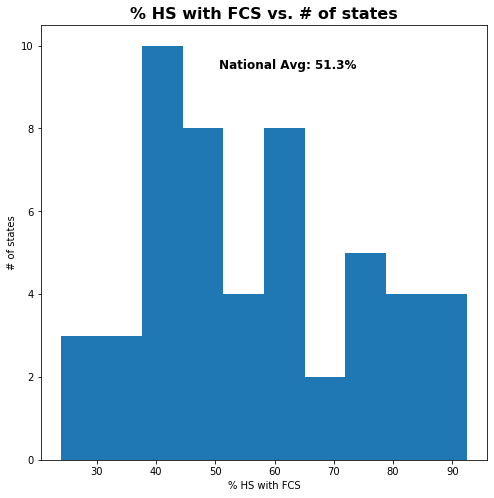

               StateName  TotalStudents PctHSwFCS ZScore_PctHSwFCS
2               Arkansas         159278     92.48             1.98
40        South Carolina         241394     92.16             1.96
20              Maryland         270650     90.08             1.84
39          Rhode Island          44343     85.71             1.60
33                Nevada         161249     82.78             1.43
19         Massachusetts         327368     82.43             1.41
6            Connecticut         169150     81.82             1.38
1                Alabama         262216     81.57             1.36
30         New Hampshire          55167     78.00             1.16
49         West Virginia          79972     76.15             1.06
44                  Utah         287198     74.47             0.96
15               Indiana         342616     74.22             0.95
45              Virginia         403527     73.28             0.90
11                Hawaii          59099     71.88             

In [16]:
#Percentage of High Schools with FCS
drawBasicHistogram(df['PctHSwFCS'],"% HS with FCS","# of states", "% HS with FCS vs. # of states", float(df_natmean['PctHSwFCS']))
displayStatePerformance(['StateName','TotalStudents','PctHSwFCS','ZScore_PctHSwFCS'],"PctHSwFCS.csv", False)


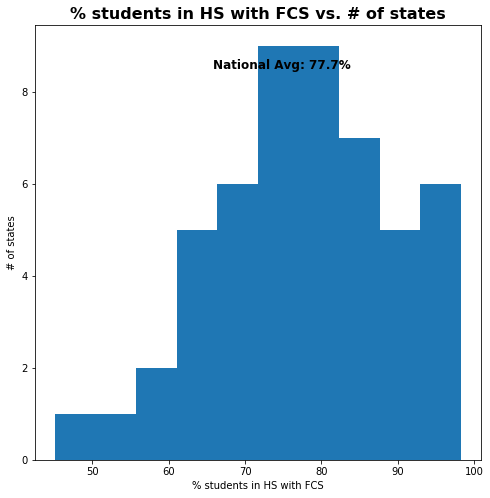

               StateName  TotalStudents PctStudentsHSwCS  \
40        South Carolina         241394            98.23   
2               Arkansas         159278            96.50   
20              Maryland         270650            96.14   
39          Rhode Island          44343            95.74   
33                Nevada         161249            95.47   
30         New Hampshire          55167            94.37   
1                Alabama         262216            89.91   
44                  Utah         287198            89.69   
19         Massachusetts         327368            89.62   
6            Connecticut         169150            88.89   
31            New Jersey         449520            87.61   
11                Hawaii          59099            87.41   
15               Indiana         342616            87.22   
49         West Virginia          79972            87.20   
45              Virginia         403527            86.04   
48             Wisconsin         279601 

In [17]:
# % of students in HS with FCS
drawBasicHistogram(df['PctStudentsHSwCS'],"% students in HS with FCS","# of states", "% students in HS with FCS vs. # of states", float(df_natmean['PctStudentsHSwCS']))
displayStatePerformance(['StateName','TotalStudents','PctStudentsHSwCS','ZScore_PctStudentsHSwCS'],"PctStudentsHSwCS.csv", False)

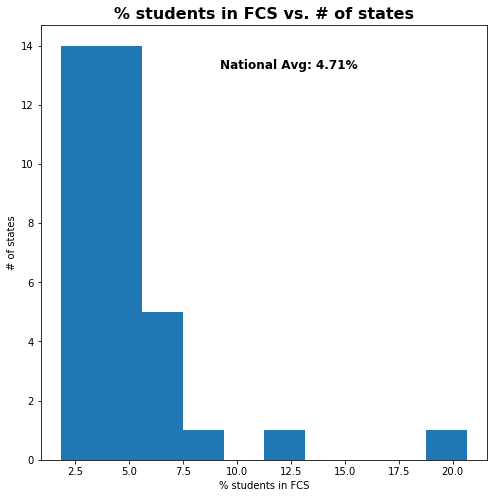

         StateName  TotalStudents Pct_InFCS ZScore_Pct_InFCS
40  South Carolina         241394     20.67             4.67
20        Maryland         270650     12.54             2.26
44            Utah         287198      9.35             1.31
36        Oklahoma         197146      7.17             0.66
31      New Jersey         449520      7.02             0.62
2         Arkansas         159278      6.47             0.46
50         Wyoming          30254      6.08             0.34
19   Massachusetts         327368      5.89             0.28
6      Connecticut         169150      5.30             0.11
25     Mississippi         155429      5.24             0.09
42       Tennessee         312860      4.96             0.01
33          Nevada         161249      4.74            -0.05
15         Indiana         342616      4.70            -0.07
48       Wisconsin         279601      4.62            -0.09
1          Alabama         262216      4.49            -0.13
34        New York      

In [18]:
# % of students in FCS
drawBasicHistogram(df_fcs['Pct_InFCS'],"% students in FCS","# of states", "% students in FCS vs. # of states", float(df_natmean['Pct_InFCS']))
displayStatePerformance(['StateName','TotalStudents','Pct_InFCS','ZScore_Pct_InFCS'],"Pct_InFCS.csv", True)

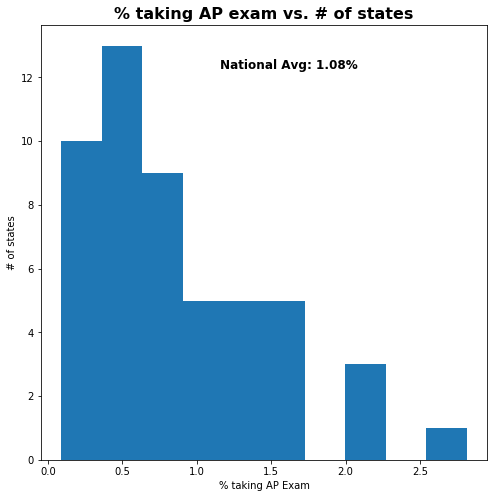

               StateName  TotalStudents Pct_InAP ZScore_Pct_InAP
20              Maryland         270650     2.82            3.26
31            New Jersey         449520     2.06            1.98
6            Connecticut         169150     2.04            1.95
7   District of Columbia          20826     2.04            1.95
19         Massachusetts         327368     1.71            1.40
39          Rhode Island          44343     1.67            1.33
4             California        2013095     1.60            1.22
9                Florida         932983     1.53            1.09
34              New York         952239     1.48            1.01
45              Virginia         403527     1.41            0.89
14              Illinois         616175     1.36            0.81
11                Hawaii          59099     1.26            0.64
10               Georgia         544289     1.24            0.62
33                Nevada         161249     1.24            0.61
47            Washington 

In [19]:
# % of students in AP
drawBasicHistogram(df['Pct_InAP'],"% taking AP Exam","# of states", "% taking AP exam vs. # of states", float(df_natmean['Pct_InAP']))
displayStatePerformance(['StateName','TotalStudents','Pct_InAP','ZScore_Pct_InAP'],"Pct_InAP.csv", False)


# CAPE Optimization Metrics

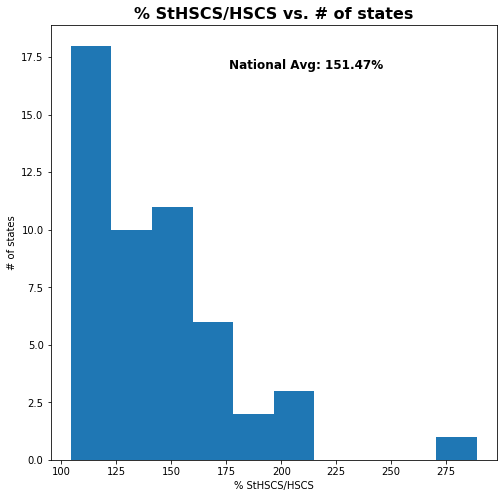

               StateName  TotalStudents CP_StHSCS_HSCS_All  \
23             Minnesota         309507             288.89   
16                Kansas         159224             207.70   
3                Arizona         407289             205.32   
9                Florida         932983             198.75   
14              Illinois         616175             188.11   
4             California        2013095             185.35   
47            Washington         372859             175.89   
26               Montana          42916             173.40   
41          South Dakota          43793             169.46   
28          North Dakota          36944             167.47   
29              Nebraska         105506             167.46   
22              Michigan         542475             165.81   
17              Kentucky         214207             159.23   
0                 Alaska          61187             159.05   
43                 Texas        1714001             158.09   
5       

In [20]:
# % students in HS with FCS / % HS with FCS

drawBasicHistogram(df['CP_StHSCS_HSCS_All'],"% StHSCS/HSCS","# of states", "% StHSCS/HSCS vs. # of states", float(df_natmean['CP_StHSCS_HSCS_All']))
displayStatePerformance(['StateName','TotalStudents','CP_StHSCS_HSCS_All','ZScore_CP_StHSCS_HSCS_All'],'CP_StHSCS_HSCS_All.csv', False)

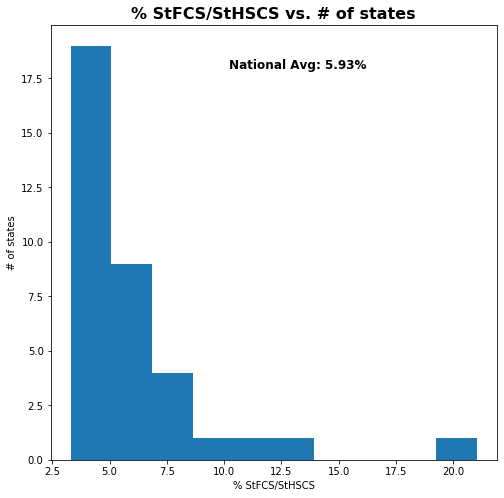

         StateName  TotalStudents CP_StFCS_StHSCS_All  \
40  South Carolina         241394               21.04   
20        Maryland         270650               13.04   
44            Utah         287198               10.43   
36        Oklahoma         197146                9.30   
50         Wyoming          30254                8.35   
31      New Jersey         449520                8.01   
42       Tennessee         312860                6.99   
25     Mississippi         155429                6.91   
2         Arkansas         159278                6.70   
19   Massachusetts         327368                6.57   
34        New York         952239                6.51   
6      Connecticut         169150                5.96   
28    North Dakota          36944                5.45   
15         Indiana         342616                5.39   
48       Wisconsin         279601                5.37   
16          Kansas         159224                5.23   
14        Illinois         6161

In [21]:
# # of students in FCS / # of student in HS with CS

drawBasicHistogram(df_fcs['CP_StFCS_StHSCS_All'],"% StFCS/StHSCS", "# of states", "% StFCS/StHSCS vs. # of states", float(df_natmean['CP_StFCS_StHSCS_All']))
displayStatePerformance(['StateName','TotalStudents','CP_StFCS_StHSCS_All','ZScore_CP_StFCS_StHSCS_All'],'CP_StFCS_StHSCS_All.csv', True)

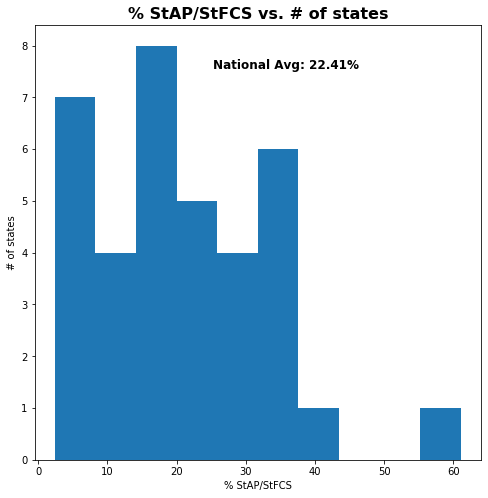

         StateName  TotalStudents CP_StAP_StFCS_All ZScore_CP_StAP_StFCS_All
9          Florida         932983             61.08                     3.24
6      Connecticut         169150             38.48                     1.43
10         Georgia         544289             37.50                     1.36
45        Virginia         403527             36.63                     1.29
34        New York         952239             34.30                     1.10
14        Illinois         616175             33.11                     1.01
8         Delaware          49864             32.45                     0.95
11          Hawaii          59099             32.43                     0.95
31      New Jersey         449520             29.30                     0.70
19   Massachusetts         327368             29.05                     0.68
47      Washington         372859             28.16                     0.61
33          Nevada         161249             26.15                     0.45

In [22]:
# # of students in AP / # of student in FCS

drawBasicHistogram(df_fcs['CP_StAP_StFCS_All'],"% StAP/StFCS", "# of states", "% StAP/StFCS vs. # of states", float(df_natmean['CP_StAP_StFCS_All']))
displayStatePerformance(['StateName','TotalStudents','CP_StAP_StFCS_All','ZScore_CP_StAP_StFCS_All'],'CP_StAP_StFCS_All.csv', True)

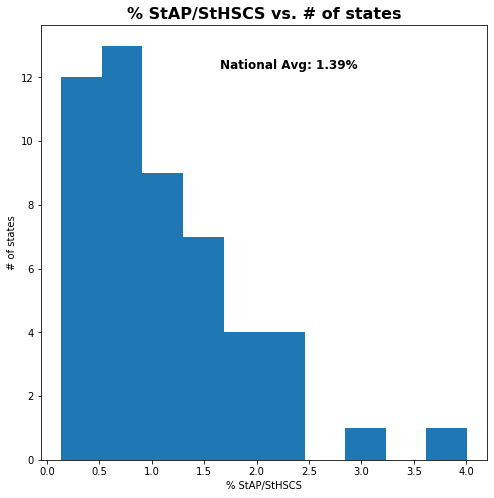

               StateName  TotalStudents CP_StAP_StHSCS_All  \
7   District of Columbia          20826               4.01   
20              Maryland         270650               2.93   
31            New Jersey         449520               2.35   
6            Connecticut         169150               2.29   
34              New York         952239               2.23   
4             California        2013095               2.13   
9                Florida         932983               2.05   
19         Massachusetts         327368               1.91   
39          Rhode Island          44343               1.74   
14              Illinois         616175               1.69   
45              Virginia         403527               1.63   
8               Delaware          49864               1.50   
10               Georgia         544289               1.49   
11                Hawaii          59099               1.44   
47            Washington         372859               1.32   
27      

In [23]:
# students taking AP exan / # students in HS with FCS

drawBasicHistogram(df['CP_StAP_StHSCS_All'],"% StAP/StHSCS", "# of states", "% StAP/StHSCS vs. # of states", float(df_natmean['CP_StAP_StHSCS_All']))
displayStatePerformance(['StateName','TotalStudents','CP_StAP_StHSCS_All','ZScore_CP_StAP_StHSCS_All'],'CP_StAP_StHSCS_All.csv', False)

# Female/Male Relative Strength Metrics

Because CSEd report deoes not report total male/female students or male/female students in HS with FCS, it is assumed that this is 51% for males/49% for females.   So RS_FemaleMale_CP_StHSCS_HSCS which is not reported is assumed to be 1.0 for all states. 

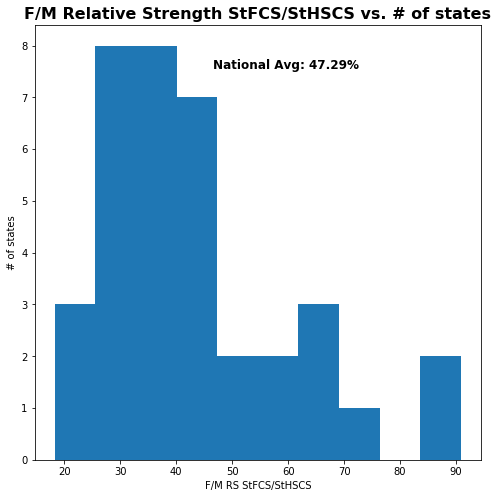

         StateName  TotalStudents RS_FemaleMaleEst_CP_StFCS_StHSCS  \
25     Mississippi         155429                            90.86   
40  South Carolina         241394                            88.12   
20        Maryland         270650                            71.23   
18       Louisiana         244519                            67.62   
1          Alabama         262216                            64.88   
14        Illinois         616175                            62.01   
36        Oklahoma         197146                            58.76   
44            Utah         287198                            54.87   
34        New York         952239                            54.22   
33          Nevada         161249                            49.50   
42       Tennessee         312860                            45.45   
49   West Virginia          79972                            43.75   
9          Florida         932983                            42.41   
2         Arkansas  

In [24]:
# Female/Male Relative Strength: Students in FCS / Student in HS with FCS 

drawBasicHistogram(df_fcs['RS_FemaleMaleEst_CP_StFCS_StHSCS'],"F/M RS StFCS/StHSCS", "# of states", "F/M Relative Strength StFCS/StHSCS vs. # of states", float(df_natmean['RS_MaleFemaleEst_CP_StFCS_StHSCS']))
displayStatePerformance(['StateName','TotalStudents','RS_FemaleMaleEst_CP_StFCS_StHSCS','ZScore_RS_FemaleMaleEst_CP_StFCS_StHSCS'],'RS_FemaleMaleEst_CP_StFCS_StHSCS.csv', True)

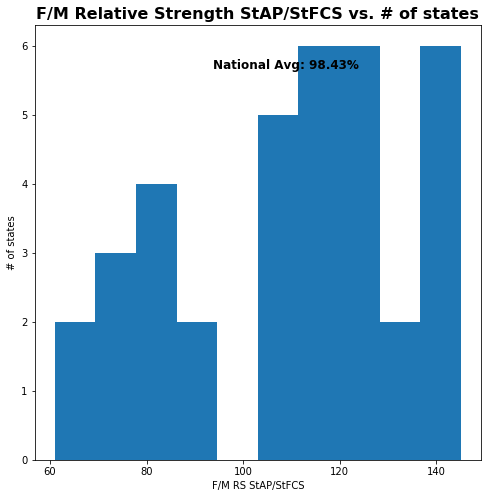

         StateName  TotalStudents RS_FemaleMale_CP_StAP_StFCS  \
50         Wyoming          30254                      145.02   
11          Hawaii          59099                      144.98   
3          Arizona         407289                      141.77   
17        Kentucky         214207                      141.69   
28    North Dakota          36944                      139.25   
8         Delaware          49864                      137.88   
13           Idaho         114591                      133.53   
49   West Virginia          79972                      132.69   
29        Nebraska         105506                      128.15   
19   Massachusetts         327368                      126.02   
47      Washington         372859                      123.22   
2         Arkansas         159278                      122.89   
45        Virginia         403527                      122.50   
33          Nevada         161249                      121.50   
6      Connecticut       

In [25]:
# Female/Male Relative Strength: Students taking AP Exam / Student in FCS course 

drawBasicHistogram(df_fcs['RS_FemaleMale_CP_StAP_StFCS'],"F/M RS StAP/StFCS", "# of states", "F/M Relative Strength StAP/StFCS vs. # of states", float(df_natmean['RS_FemaleMale_CP_StAP_StFCS']))
displayStatePerformance(['StateName','TotalStudents','RS_FemaleMale_CP_StAP_StFCS','ZScore_RS_FemaleMale_CP_StAP_StFCS'],'RS_FemaleMale_CP_StAP_StFCS.csv', True)

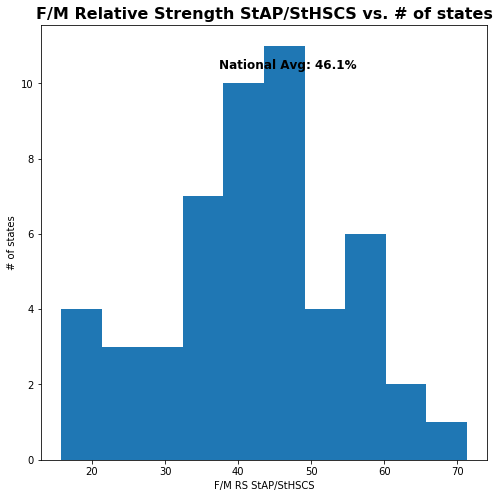

               StateName  TotalStudents RS_FemaleMaleEst_CP_StAP_StHSCS  \
7   District of Columbia          20826                           71.32   
25           Mississippi         155429                           63.52   
1                Alabama         262216                           60.71   
33                Nevada         161249                           60.15   
20              Maryland         270650                           59.77   
50               Wyoming          30254                           58.76   
49         West Virginia          79972                           58.05   
34              New York         952239                           57.02   
18             Louisiana         244519                           55.80   
40        South Carolina         241394                           54.62   
11                Hawaii          59099                           54.17   
42             Tennessee         312860                           51.47   
2               Arkansas 

In [26]:
# Female/Male Relative Strength: Students taking AP Exam / Student in HS with FCS 

drawBasicHistogram(df['RS_FemaleMaleEst_CP_StAP_StHSCS'],"F/M RS StAP/StHSCS", "# of states", "F/M Relative Strength StAP/StHSCS vs. # of states", float(df_natmean['RS_FemaleMaleEst_CP_StAP_StHSCS']))
displayStatePerformance(['StateName','TotalStudents','RS_FemaleMaleEst_CP_StAP_StHSCS','ZScore_RS_FemaleMaleEst_CP_StAP_StHSCS'],'RS_FemaleMaleEst_CP_StAP_StHSCS.csv', False)

# Black/White Relative Strength Metrics

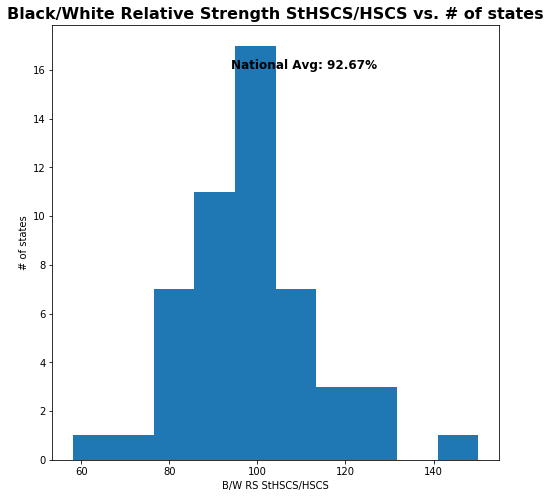

               StateName  TotalStudents RS_BlackWhite_CP_StHSCS_HSCS  \
16                Kansas         159224                       150.20   
41          South Dakota          43793                       130.57   
29              Nebraska         105506                       129.93   
21                 Maine          54378                       128.27   
28          North Dakota          36944                       120.59   
46               Vermont          26554                       120.58   
26               Montana          42916                       113.66   
13                 Idaho         114591                       112.15   
50               Wyoming          30254                       110.13   
49         West Virginia          79972                       109.42   
37                Oregon         196708                       108.78   
11                Hawaii          59099                       107.82   
36              Oklahoma         197146                       10

In [27]:
df_fcs = df_fcs.loc[df_fcs['InFCS_White'].notnull()]

# Black/White Relative Strength: Student in HS with FCS / HS with FCS 

drawBasicHistogram(df['RS_BlackWhite_CP_StHSCS_HSCS'],"B/W RS StHSCS/HSCS", "# of states", "Black/White Relative Strength StHSCS/HSCS vs. # of states", float(df_natmean['RS_BlackWhite_CP_StHSCS_HSCS']))
displayStatePerformance(['StateName','TotalStudents','RS_BlackWhite_CP_StHSCS_HSCS','ZScore_RS_BlackWhite_CP_StHSCS_HSCS'],'RS_BlackWhite_CP_StHSCS_HSCS.csv', False)

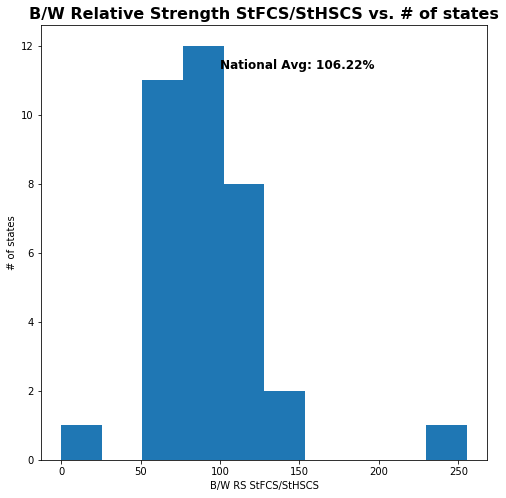

         StateName  TotalStudents RS_BlackWhite_CP_StFCS_StHSCS  \
14        Illinois         616175                        255.49   
18       Louisiana         244519                        149.93   
34        New York         952239                        139.27   
44            Utah         287198                        120.92   
20        Maryland         270650                        119.81   
25     Mississippi         155429                        118.31   
48       Wisconsin         279601                        117.09   
42       Tennessee         312860                        114.49   
11          Hawaii          59099                        114.43   
2         Arkansas         159278                        110.25   
8         Delaware          49864                        107.07   
47      Washington         372859                        100.79   
1          Alabama         262216                         99.69   
15         Indiana         342616                         97.3

In [28]:
# Black/White Relative Strength: Students in FCS / Student in HS with FCS 

drawBasicHistogram(df_fcs['RS_BlackWhite_CP_StFCS_StHSCS'],"B/W RS StFCS/StHSCS", "# of states", "B/W Relative Strength StFCS/StHSCS vs. # of states", float(df_natmean['RS_BlackWhite_CP_StFCS_StHSCS']))
displayStatePerformance(['StateName','TotalStudents','RS_BlackWhite_CP_StFCS_StHSCS','ZScore_RS_BlackWhite_CP_StFCS_StHSCS'],'RS_BlackWhite_CP_StFCS_StHSCS.csv', True)


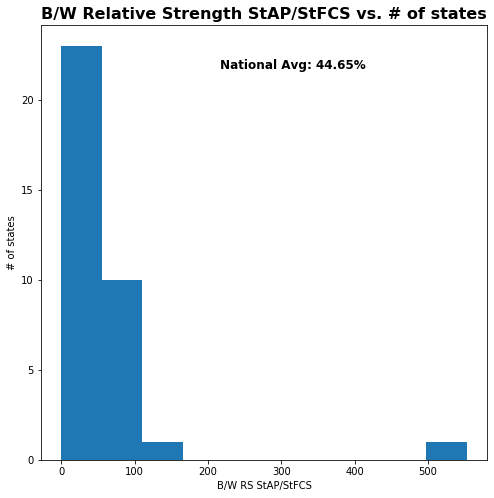

         StateName  TotalStudents RS_BlackWhite_CP_StAP_StFCS  \
13           Idaho         114591                      553.19   
12            Iowa         164316                      125.78   
37          Oregon         196708                      101.81   
29        Nebraska         105506                       88.07   
19   Massachusetts         327368                       85.35   
32      New Mexico         110610                       82.63   
42       Tennessee         312860                       71.96   
44            Utah         287198                       71.19   
49   West Virginia          79972                       65.05   
9          Florida         932983                       64.26   
34        New York         952239                       59.37   
3          Arizona         407289                       56.22   
47      Washington         372859                       53.56   
24        Missouri         278007                       53.10   
33          Nevada       

In [29]:
# Black/White Relative Strength: Students taking AP Exam / Student in FCS course 

drawBasicHistogram(df_fcs['RS_BlackWhite_CP_StAP_StFCS'],"B/W RS StAP/StFCS", "# of states", "B/W Relative Strength StAP/StFCS vs. # of states", float(df_natmean['RS_BlackWhite_CP_StAP_StFCS']))
displayStatePerformance(['StateName','TotalStudents','RS_BlackWhite_CP_StAP_StFCS','ZScore_RS_BlackWhite_CP_StAP_StFCS'],'RS_BlackWhite_CP_StAP_StFCS.csv', True)

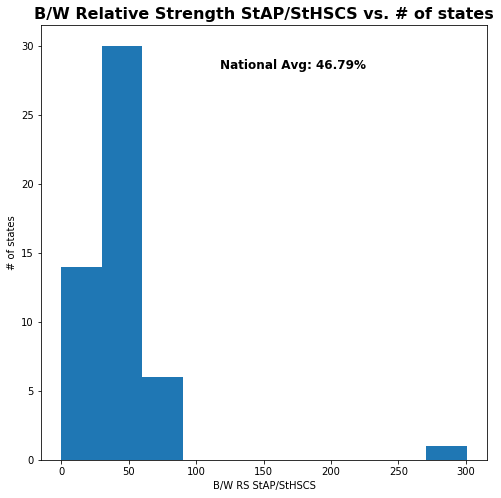

               StateName  TotalStudents RS_BlackWhite_CP_StAP_StHSCS  \
26               Montana          42916                       300.89   
44                  Utah         287198                        86.08   
34              New York         952239                        82.69   
42             Tennessee         312860                        82.39   
37                Oregon         196708                        68.96   
19         Massachusetts         327368                        68.04   
12                  Iowa         164316                        65.46   
23             Minnesota         309507                        54.31   
47            Washington         372859                        53.98   
41          South Dakota          43793                        53.17   
3                Arizona         407289                        52.90   
35                  Ohio         565557                        52.70   
1                Alabama         262216                        4

In [30]:
# Black/White Relative Strength: Students taking AP / Student in HS with FCS

drawBasicHistogram(df['RS_BlackWhite_CP_StAP_StHSCS'],"B/W RS StAP/StHSCS", "# of states", "B/W Relative Strength StAP/StHSCS vs. # of states", float(df_natmean['RS_BlackWhite_CP_StAP_StHSCS']))
displayStatePerformance(['StateName','TotalStudents','RS_BlackWhite_CP_StAP_StHSCS','ZScore_RS_BlackWhite_CP_StAP_StHSCS'],'RS_BlackWhite_CP_StAP_StHSCS.csv', False)

# HLLL/White Relative Strength Metrics (Hispanic/LatinX)

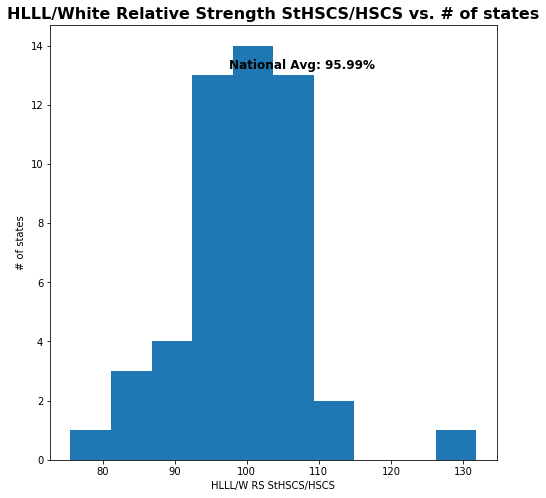

               StateName  TotalStudents RS_HLLLWhite_CP_StHSCS_HSCS  \
16                Kansas         159224                      131.83   
29              Nebraska         105506                      112.63   
14              Illinois         616175                      109.62   
26               Montana          42916                      109.11   
41          South Dakota          43793                      108.95   
49         West Virginia          79972                      108.83   
50               Wyoming          30254                      108.31   
24              Missouri         278007                      107.82   
18             Louisiana         244519                      107.19   
36              Oklahoma         197146                      105.91   
21                 Maine          54378                      105.58   
9                Florida         932983                      105.27   
1                Alabama         262216                      104.77   
25    

In [31]:
# Hispanic-LatinX/White Relative Strength: Student in HS with FCS / HS with FCS 

drawBasicHistogram(df['RS_HLLLWhite_CP_StHSCS_HSCS'],"HLLL/W RS StHSCS/HSCS", "# of states", "HLLL/White Relative Strength StHSCS/HSCS vs. # of states", float(df_natmean['RS_HLLLWhite_CP_StHSCS_HSCS']))
displayStatePerformance(['StateName','TotalStudents','RS_HLLLWhite_CP_StHSCS_HSCS','ZScore_RS_HLLLWhite_CP_StHSCS_HSCS'],'RS_HLLLWhite_CP_StHSCS_HSCS.csv', False)

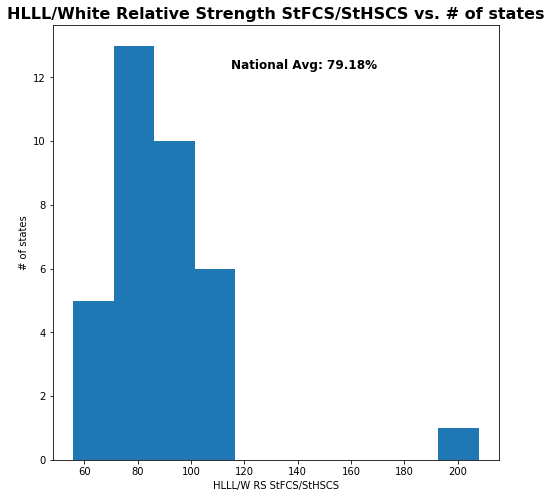

         StateName  TotalStudents RS_HLLLWhite_CP_StFCS_StHSCS  \
14        Illinois         616175                       207.96   
34        New York         952239                       113.87   
44            Utah         287198                       112.89   
49   West Virginia          79972                       109.86   
33          Nevada         161249                       106.35   
37          Oregon         196708                       101.94   
15         Indiana         342616                       101.69   
48       Wisconsin         279601                       101.41   
18       Louisiana         244519                        98.90   
2         Arkansas         159278                        98.54   
25     Mississippi         155429                        98.49   
1          Alabama         262216                        91.04   
40  South Carolina         241394                        90.74   
42       Tennessee         312860                        89.75   
50        

In [32]:
# Hispanic-LatinX/White Relative Strength: Students in FCS / Student in HS with FCS 

drawBasicHistogram(df_fcs['RS_HLLLWhite_CP_StFCS_StHSCS'],"HLLL/W RS StFCS/StHSCS", "# of states", "HLLL/White Relative Strength StFCS/StHSCS vs. # of states", float(df_natmean['RS_HLLLWhite_CP_StFCS_StHSCS']))
displayStatePerformance(['StateName','TotalStudents','RS_HLLLWhite_CP_StFCS_StHSCS','ZScore_RS_HLLLWhite_CP_StFCS_StHSCS'],'RS_HLLLWhite_CP_StFCS_StHSCS.csv', True)

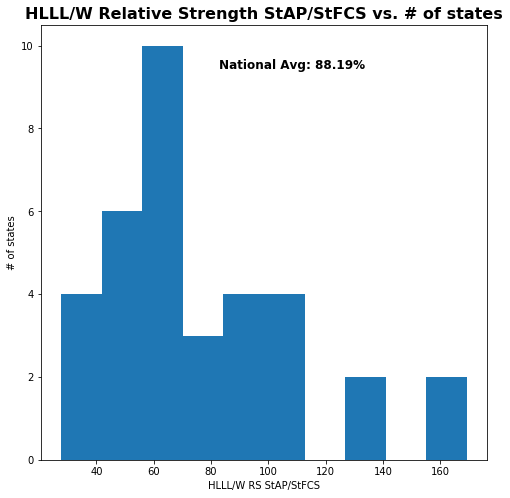

         StateName  TotalStudents RS_HLLLWhite_CP_StAP_StFCS  \
49   West Virginia          79972                     169.33   
11          Hawaii          59099                     168.27   
12            Iowa         164316                     130.41   
25     Mississippi         155429                     129.52   
42       Tennessee         312860                     111.07   
18       Louisiana         244519                     110.54   
9          Florida         932983                     103.86   
13           Idaho         114591                     100.58   
1          Alabama         262216                      98.51   
17        Kentucky         214207                      93.15   
2         Arkansas         159278                      86.87   
34        New York         952239                      85.07   
45        Virginia         403527                      78.36   
31      New Jersey         449520                      74.57   
19   Massachusetts         327368       

In [33]:
# Hispanic-LatinX/White Relative Strength: Students taking AP Exam / Student in FCS course 

drawBasicHistogram(df_fcs['RS_HLLLWhite_CP_StAP_StFCS'],"HLLL/W RS StAP/StFCS", "# of states", "HLLL/W Relative Strength StAP/StFCS vs. # of states", float(df_natmean['RS_HLLLWhite_CP_StAP_StFCS']))
displayStatePerformance(['StateName','TotalStudents','RS_HLLLWhite_CP_StAP_StFCS','ZScore_RS_HLLLWhite_CP_StAP_StFCS'],'RS_HLLLWhite_CP_StAP_StFCS.csv', True)


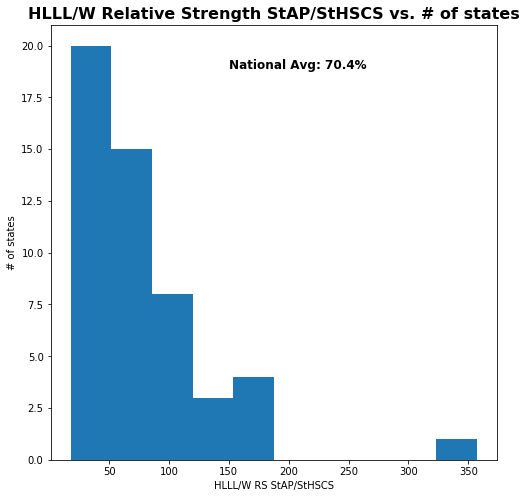

               StateName  TotalStudents RS_HLLLWhite_CP_StAP_StHSCS  \
26               Montana          42916                      356.97   
49         West Virginia          79972                      186.03   
21                 Maine          54378                      185.12   
46               Vermont          26554                      175.92   
41          South Dakota          43793                      160.54   
11                Hawaii          59099                      133.11   
25           Mississippi         155429                      127.56   
30         New Hampshire          55167                      123.80   
18             Louisiana         244519                      109.32   
0                 Alaska          61187                      103.44   
42             Tennessee         312860                       99.69   
34              New York         952239                       96.87   
12                  Iowa         164316                       95.40   
35    

In [34]:
# Hispanic-LatinX/White Relative Strength: Students taking AP / Student in HS with FCS

drawBasicHistogram(df['RS_HLLLWhite_CP_StAP_StHSCS'],"HLLL/W RS StAP/StHSCS", "# of states", "HLLL/W Relative Strength StAP/StHSCS vs. # of states", float(df_natmean['RS_HLLLWhite_CP_StAP_StHSCS']))
displayStatePerformance(['StateName','TotalStudents','RS_HLLLWhite_CP_StAP_StHSCS','ZScore_RS_HLLLWhite_CP_StAP_StHSCS'],'RS_HLLLWhite_CP_StAP_StHSCS.csv', False)

In [37]:
key_metrics = ['PctHSwFCS','PctStudentsHSwCS','Pct_InFCS','Pct_InAP',
               'CP_StHSCS_HSCS_All','CP_StFCS_StHSCS_All','CP_StAP_StFCS_All','CP_StAP_StHSCS_All',
               'RS_FemaleMaleEst_CP_StFCS_StHSCS','RS_FemaleMale_CP_StAP_StFCS','RS_FemaleMaleEst_CP_StAP_StHSCS',
               'RS_BlackWhite_CP_StHSCS_HSCS','RS_BlackWhite_CP_StFCS_StHSCS','RS_BlackWhite_CP_StAP_StFCS','RS_BlackWhite_CP_StAP_StHSCS',
               'RS_HLLLWhite_CP_StHSCS_HSCS','RS_HLLLWhite_CP_StFCS_StHSCS','RS_HLLLWhite_CP_StAP_StFCS','RS_HLLLWhite_CP_StAP_StHSCS']

key_metrics_zscore = []
for km in key_metrics:
    key_metrics_zscore.append("ZScore_" + km)
    
key_metrics = ['StateName', 'TotalStudents'] + key_metrics
key_metrics_zscore = ['StateName', 'TotalStudents'] + key_metrics_zscore

df[key_metrics].to_csv("key_metrics.csv")
df[key_metrics_zscore].to_csv("key_metrics_zscore.csv")

